<h1>Korean Baseball pitching Analysis</h1>

<b>This notebook showcases an example of a simple linear regression model using Korean Baseball Pitching Data (1982 - 2021)</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.formula.api import ols

In [2]:
pitchingData = pd.read_csv('/kaggle/input/korean-baseball-pitching-data-1982-2021/kbopitchingdata.csv')

<h2>Data Preparation</h2>

In [3]:
pitchingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

In [4]:
pitchingData.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [5]:
pitchingData = pitchingData[['wins','walks','ERA','hits','earned_runs','strikeouts','win_loss_percentage','runs_per_game','hits_9','WHIP']]

<h2>Check for Linearity</h2>

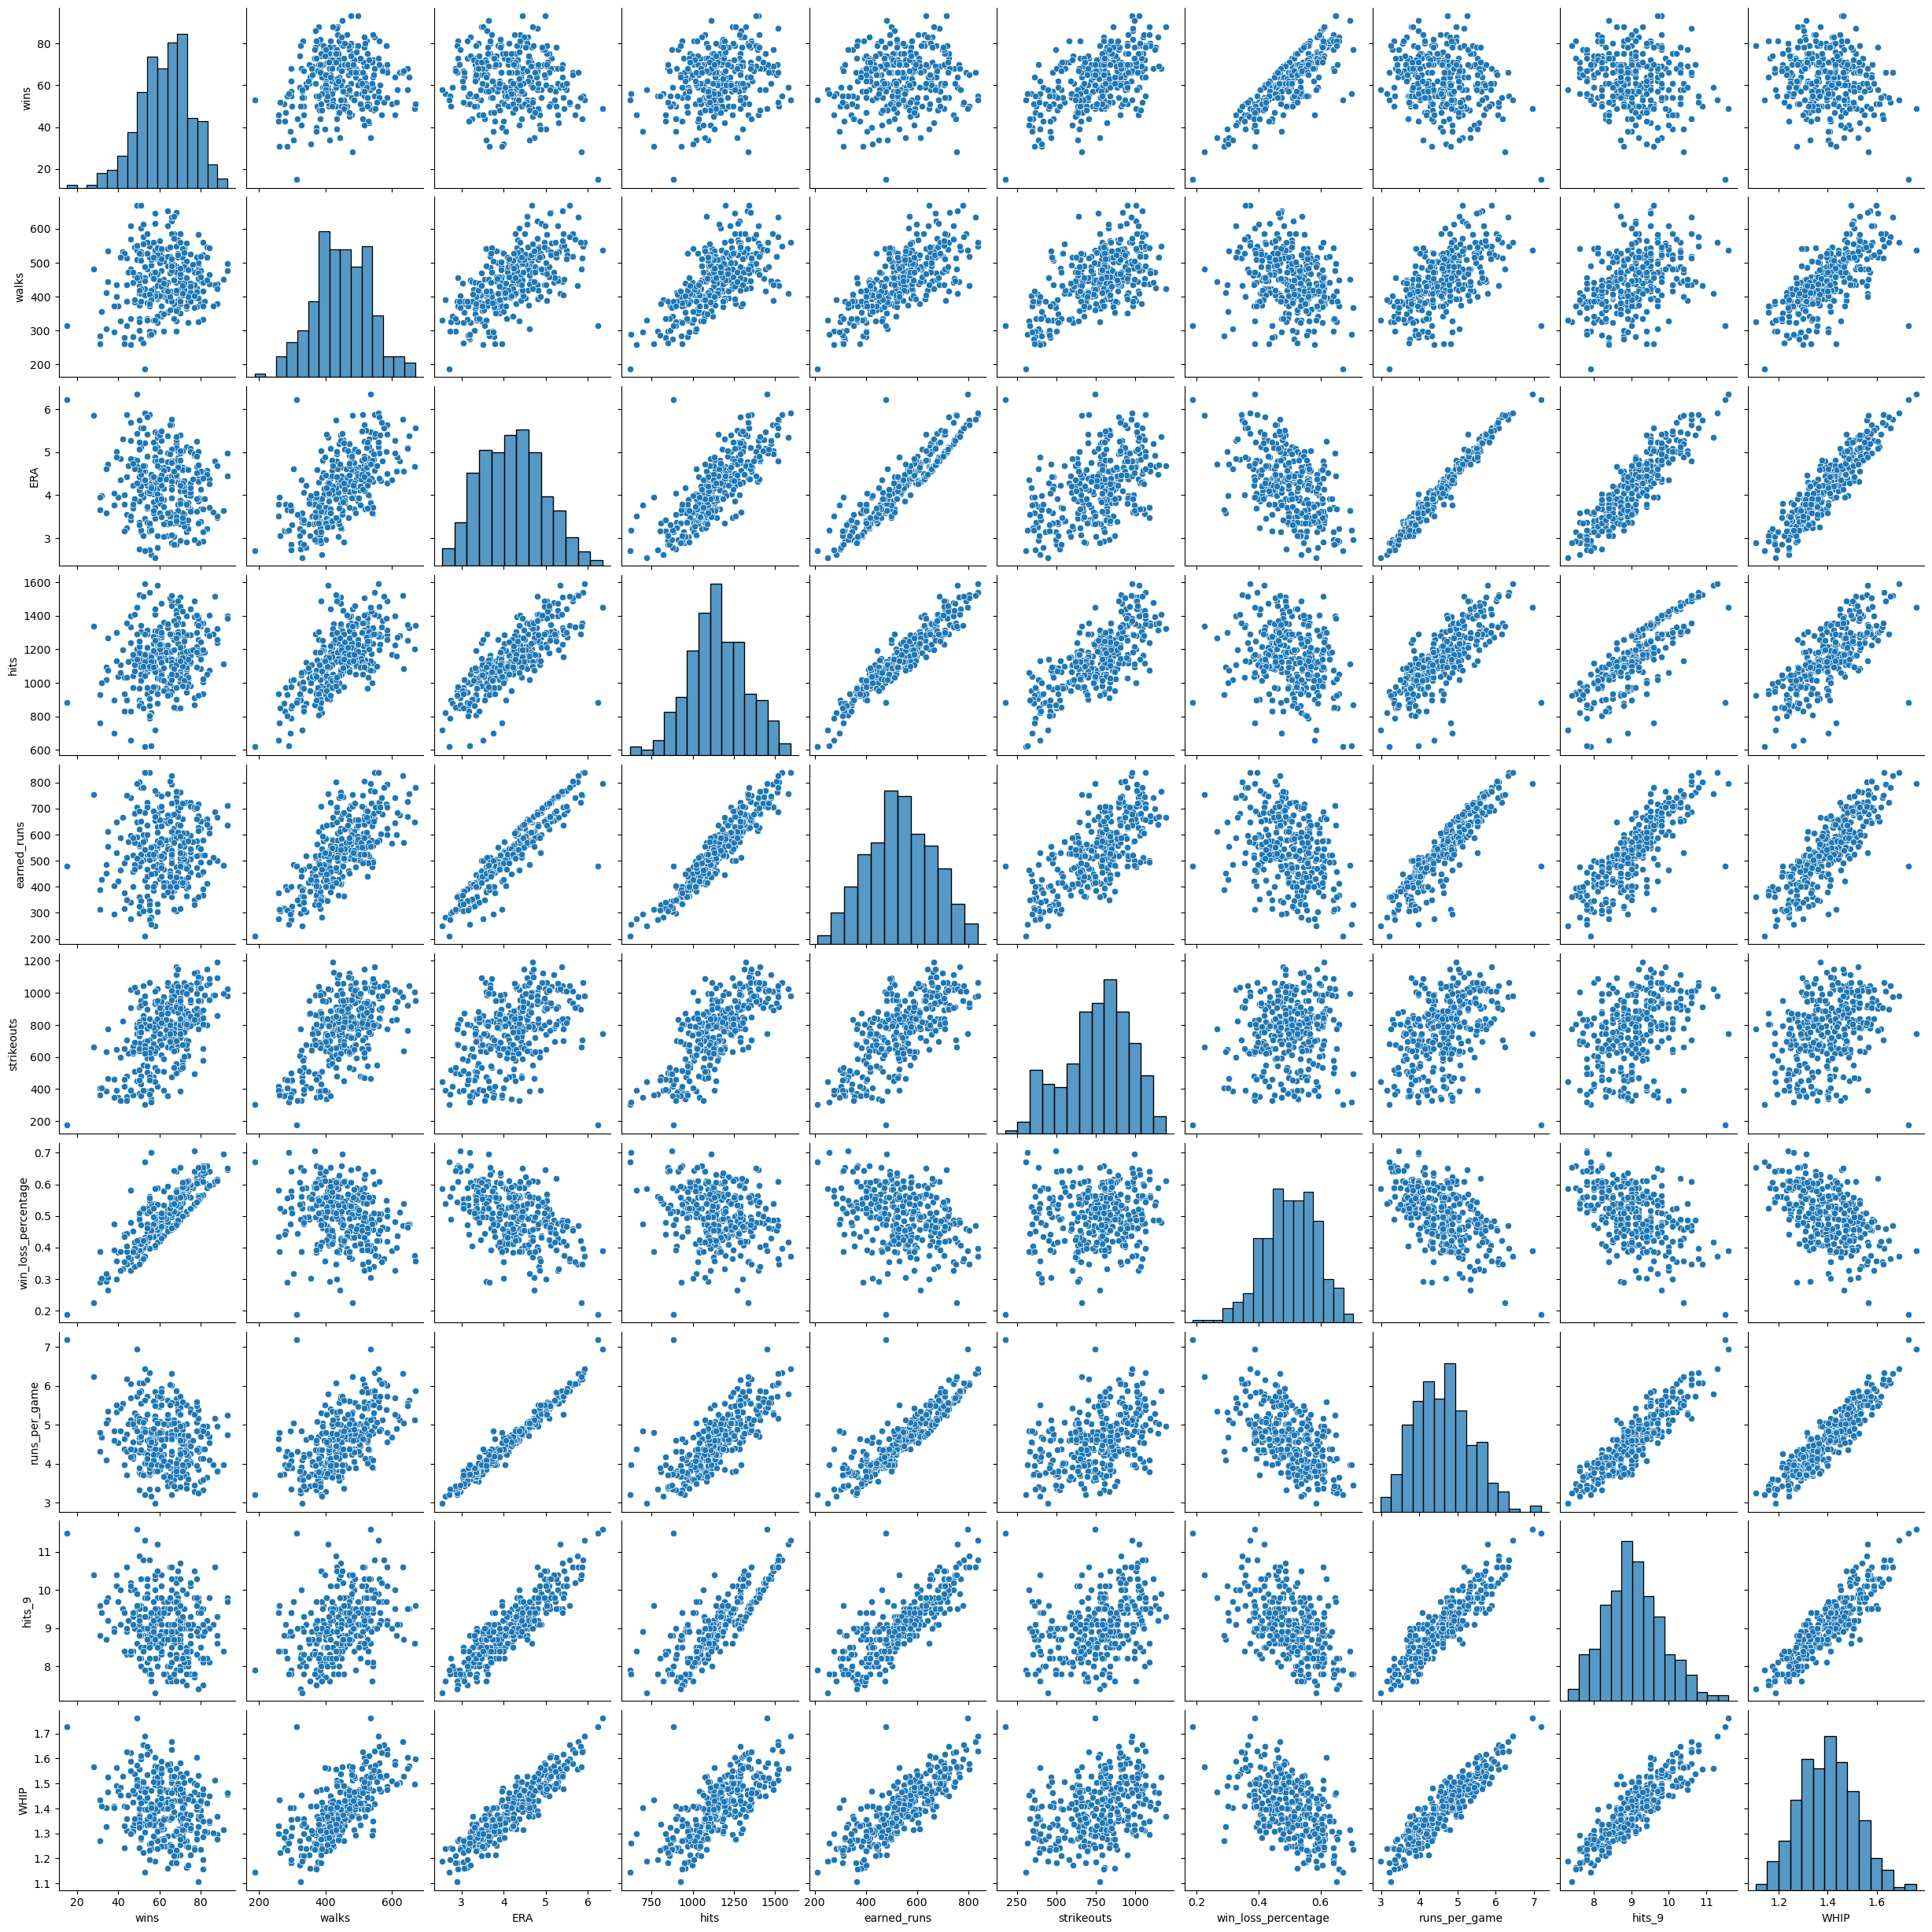

In [6]:
sns.pairplot(pitchingData)

<b> .fter examining the data, I would like to build a model to predict runs per game by using WHIP as the independent variable. Both variables are continuous, independent, approximately normal, and appear to have a linear relationship</b>

<h2>Build the Model</h2>

In [7]:
olsData = pitchingData[['runs_per_game','WHIP']]

In [8]:
olsFormula = 'runs_per_game ~ WHIP'

In [9]:
OLS = ols(formula = olsFormula, data = olsData)
model = OLS.fit()

<Axes: xlabel='WHIP', ylabel='runs_per_game'>

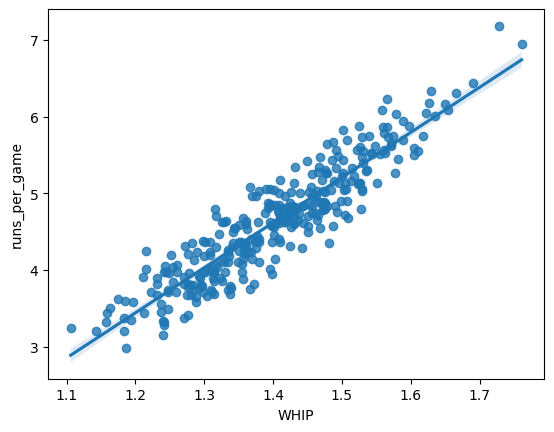

In [10]:
sns.regplot(data = olsData, x = 'WHIP', y = 'runs_per_game')

<h2>Check Model Assumptions</h2>

<h3>Check for Normality</h3>

In [11]:
fitted_values = model.predict(olsData['WHIP'])
residuals = model.resid

In [12]:
residuals = model.resid

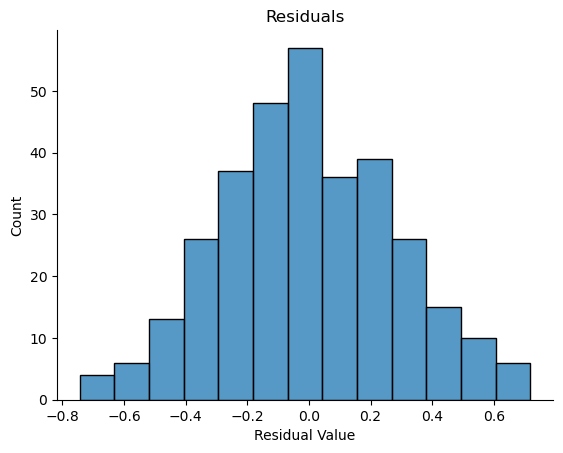

In [13]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Residuals")
sns.despine()

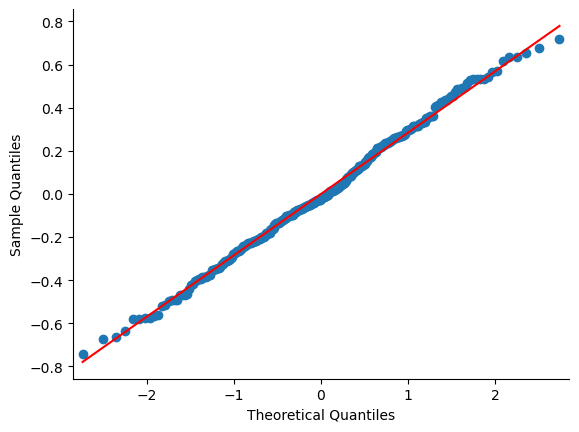

In [14]:
import statsmodels.api as sm
fig = sm.qqplot(residuals, line = 's')
sns.despine()

<h3>Check for Homoscedasticity</h3>

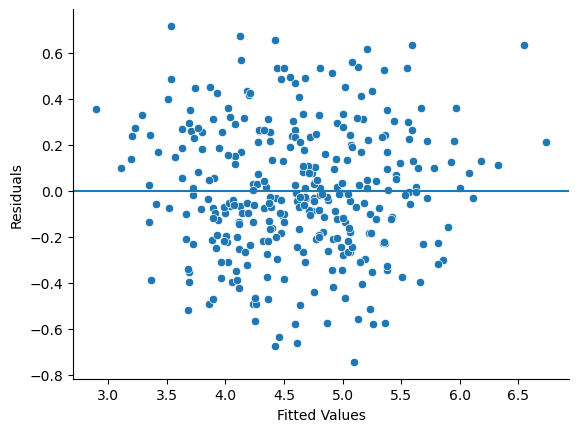

In [15]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
sns.despine()

<h1>Model Evaluation</h1>

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          runs_per_game   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1811.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          5.20e-134
Time:                        16:46:15   Log-Likelihood:                -52.268
No. Observations:                 323   AIC:                             108.5
Df Residuals:                     321   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6058      0.194    -18.586      0.000      -3.987      -3.224
WHIP           5.8744      0.138     42.553      0.000       5.603       6.146
==============================================================================
Omnibus:                        1.752   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.586
Skew:                           0.057   Prob(JB):                        0.452
Kurtosis:                       2.677   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The cofficient estimate for WHIP is 5.8744 with a P-value of 0.000 and a 95% CI [5.603,6.146].<br>
R-squared is .849, which shows that there is a good model fit. <br>
(The P-value in a linear regression is the probability that there is no correlation between the independent and dependent variable.)

<h1>Model Interpretation</h1>

<b>Formula:</b> <br> <i>Runs Per Game = -3.6058 + 5.8744 x WHIP</i>

In [17]:
intercept = -3.6058
slope = 5.8744

A team's pitcher has a contract that is expiring soon. He has a WHIP of 1.5, and the team wants to predict how many runs per game the pitcher is likely to give up.

In [18]:
whip = 1.5

In [19]:
runsPerGame = (whip*slope) + intercept

In [20]:
print(f"The pitcher is predicted to give up {round(runsPerGame,1)} runs per game.")

The pitcher is predicted to give up 5.2 runs per game.


Suppose the team wants to keep the opposing teams runs per game to 3 or below. 

In [21]:
runsPerGame = 3

In [22]:
whip = (runsPerGame - intercept) / slope

In [23]:
print(f"If the team wants to keep the opposing team's runs to 3 or below,\nthey should maintain a pitching staff with a WHIP of {round(whip,2)} or below")

If the team wants to keep the opposing team's runs to 3 or below,
they should maintain a pitching staff with a WHIP of 1.12 or below


Given this result, the team should not re-sign the pitcher